<a href="https://colab.research.google.com/github/balaajhi/One-step-at-a-time/blob/main/Regression_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trading Strategies powered by Machine Learning - Regression

## Linear Regression with scikit-learn - example

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import datetime as dt
import pandas as pd
%pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.4 MB 7.7 MB/s 
     |████████████████████████████████| 63 kB 720 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])

In [ ]:
revenue = np.array([2.6, 19. , 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [ ]:
df = pd.DataFrame(data = {"revenue":revenue, "budget":budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,27
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,73.1,54
9,69.7,60


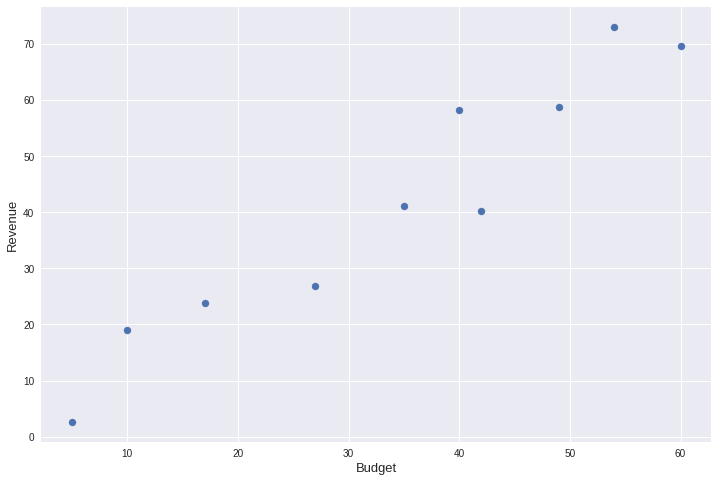

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50)
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.show()

__Linear Relationship between Budget and Revenue__:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression(fit_intercept = True)

In [ ]:
lm.fit(X = df.budget.to_frame(), y = df.revenue) # fitting the model (Regression Line)

LinearRegression()

In [ ]:
slope = lm.coef_ # slope of Regression Line
slope

array([1.19897684])

In [ ]:
intercept = lm.intercept_ # intercept of Regression Line
intercept

0.7046849757673712

In [ ]:
df["pred"] = lm.predict(df.budget.to_frame())
df

,revenue,budget,pred
0,2.6,5,6.699569
1,19.0,10,12.694453
2,23.8,17,21.087291
3,26.9,27,33.077060
4,41.1,35,42.668875
5,58.3,40,48.663759
6,40.3,42,51.061712
7,58.7,49,59.454550
8,73.1,54,65.449435
9,69.7,60,72.643296


In [ ]:
x_lin = np.array([0, 100])
y_lin = intercept + slope * x_lin

In [ ]:
y_lin

array([  0.70468498, 120.60236941])

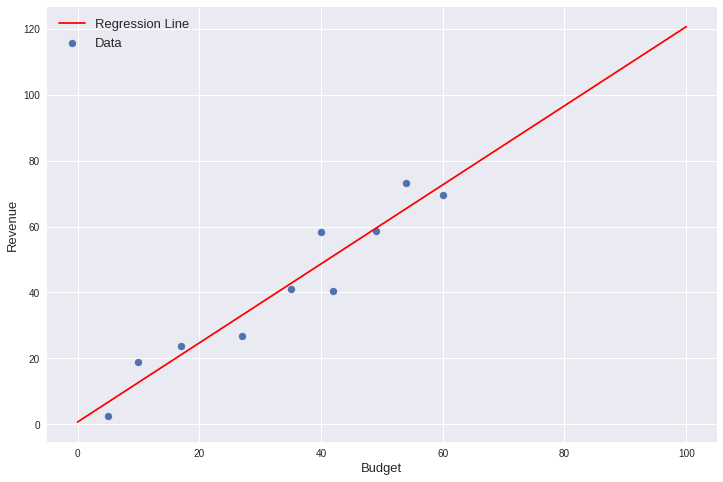

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Making Predictions with Linear Regression

__new movies (observations/data points)__

In [ ]:
budget_new = np.array([63, 66, 74, 80, 85]) 

In [ ]:
revenue_new = np.array([74.2,  80.7, 98.2,  94.8, 101.7]) 

In [ ]:
df_new = pd.DataFrame(data = {"revenue":revenue_new, "budget":budget_new})
df_new

,revenue,budget
0,74.2,63
1,80.7,66
2,98.2,74
3,94.8,80
4,101.7,85


In [ ]:
df_new["pred"] = lm.predict(df_new.budget.to_frame())
df_new

,revenue,budget,pred
0,74.2,63,76.240226
1,80.7,66,79.837157
2,98.2,74,89.428971
3,94.8,80,96.622833
4,101.7,85,102.617717


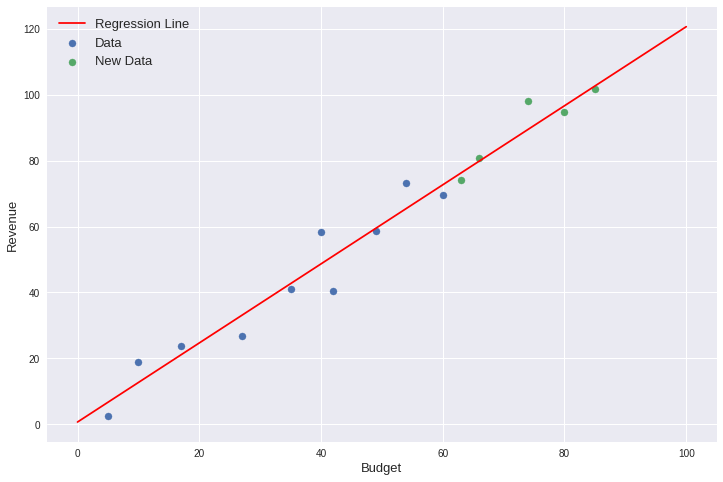

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Overfitting

__Overfitting__: Model performs well on the original (training) dataset, but it does not generalize well to new data (test set).
Overfitting happens when the __model is too complex__ (too many parameters) and detects subtle patterns (noise) in the training set. 

Example: __Polynomial Model__ with degree = 9 (perfect fit)

![image-3.png](attachment:image-3.png)

In [ ]:
poly_m = np.polyfit(x = df.budget, y = df.revenue, deg = 9) # polynomial regression (deg = 9)

In [ ]:
poly_m # 10 regression parameters (intercept + 9 regression coefficients)

array([ 2.31988761e-09, -6.91663856e-07,  8.80409587e-05, -6.24271101e-03,
        2.69731803e-01, -7.29512945e+00,  1.21996447e+02, -1.19724559e+03,
        6.13254339e+03, -1.21710591e+04])

In [ ]:
x_poly = np.linspace(0, 100, 1000) # x values for polynomial regression line/curve

In [ ]:
y_poly = np.polyval(poly_m, x_poly) # y values for polynomial regression line/curve

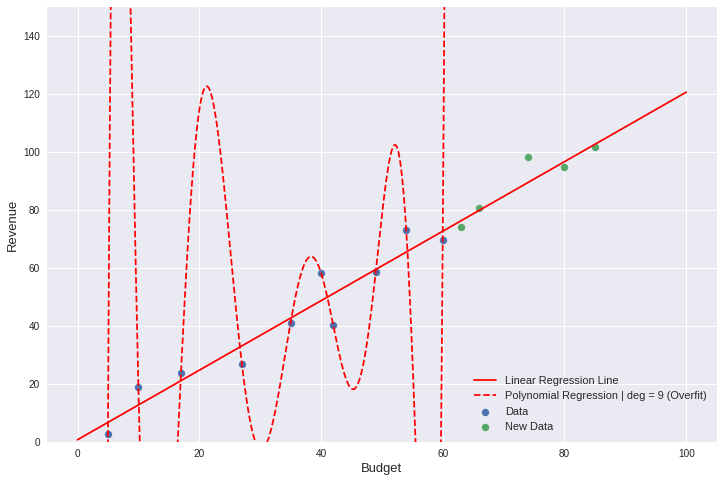

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)",linestyle = "--", color = "red")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()

__Solutions__ to overcome overfitting:

- use a __simpler model__ with fewer parameters (linear rather than polynomial)<br>
- more and better data (remove outliers & errors) <br>
- constrain the model -> make the model more simple with __Regularization__

##  Underfitting

__Underfitting__: Model performs neither well on the original (training) dataset, nor does it generalize well to new data (test set).
Underfitting happens when the __model is too simple__ to learn the underlying structure of the data.

most simple (linear) model with only one paramter: __y = a__ <br>
intercept == a (e.g. the mean)<br>
slope == 0 

In [ ]:
mean = df.revenue.mean()
mean

41.349999999999994

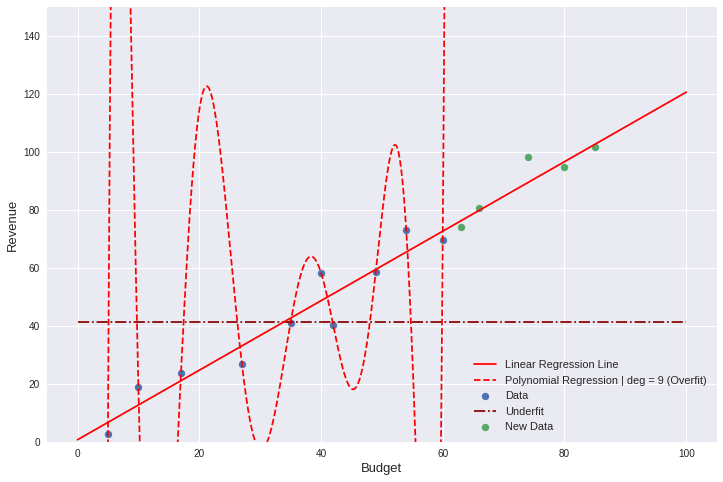

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)",linestyle = "--", color = "red")
plt.hlines(y = mean, xmin = 0, xmax = 100, linestyle = "-.", color = "darkred", label = "Underfit")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()

__Solutions__ to overcome underfitting:

- use a __more powerful model__ with more parameters<br>
- add more/better features (independent variables) to the algorithm -> Feature Engineering <br>
- reduce the constraints of the model -> make it more complex with __less Regularization__

## Getting the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
start = dt.datetime.today()-dt.timedelta(7)
end = dt.datetime.today()
data = pd.DataFrame()
interval = "90m"
ticker = 'EURUSD=X'
df= yf.download(ticker,start,end,interval = '1m')
data['price']= df[['Adj Close']]
data

[*********************100%***********************]  1 of 1 completed


,price
Datetime,
2022-01-27 21:13:00+00:00,1.114703
2022-01-27 21:14:00+00:00,1.114703
2022-01-27 21:15:00+00:00,1.114703
2022-01-27 21:16:00+00:00,1.114703
2022-01-27 21:17:00+00:00,1.114827
...,...
2022-02-03 21:07:00+00:00,1.143772
2022-02-03 21:08:00+00:00,1.143772
2022-02-03 21:09:00+00:00,1.143772


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6995 entries, 2022-01-27 21:13:00+00:00 to 2022-02-03 21:11:37+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   6995 non-null   float64
dtypes: float64(1)
memory usage: 109.3 KB


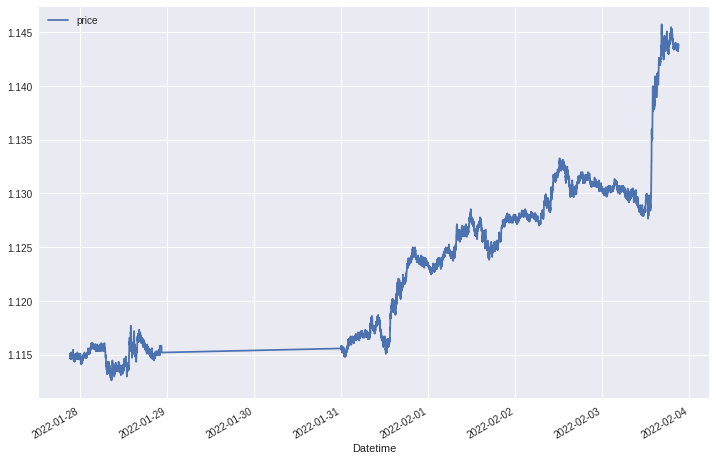

In [ ]:
data.plot(figsize = (12, 8))
plt.show()

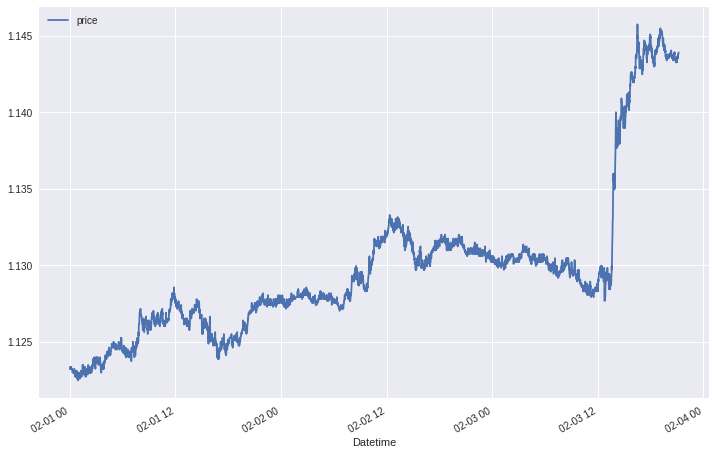

In [ ]:
data.loc["2022-02"].plot(figsize = (12, 8))
plt.show()

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))

In [ ]:
data

,price,returns
Datetime,,
2022-01-27 21:13:00+00:00,1.114703,NaN
2022-01-27 21:14:00+00:00,1.114703,0.000000
2022-01-27 21:15:00+00:00,1.114703,0.000000
2022-01-27 21:16:00+00:00,1.114703,0.000000
2022-01-27 21:17:00+00:00,1.114827,0.000111
...,...,...
2022-02-03 21:07:00+00:00,1.143772,0.000229
2022-02-03 21:08:00+00:00,1.143772,0.000000
2022-02-03 21:09:00+00:00,1.143772,0.000000


## A simple Linear Model to predict Financial Returns (Part 1)

Correct: Predicting __Returns__ <br>
Wrong: Predicting __Prices__

In [ ]:
data

,price,returns
Datetime,,
2022-01-27 21:13:00+00:00,1.114703,NaN
2022-01-27 21:14:00+00:00,1.114703,0.000000
2022-01-27 21:15:00+00:00,1.114703,0.000000
2022-01-27 21:16:00+00:00,1.114703,0.000000
2022-01-27 21:17:00+00:00,1.114827,0.000111
...,...,...
2022-02-03 21:07:00+00:00,1.143772,0.000229
2022-02-03 21:08:00+00:00,1.143772,0.000000
2022-02-03 21:09:00+00:00,1.143772,0.000000


In [ ]:
data["lag1"] = data.returns.shift(1)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

,price,returns,lag1
Datetime,,,
2022-01-27 21:15:00+00:00,1.114703,0.000000,0.000000
2022-01-27 21:16:00+00:00,1.114703,0.000000,0.000000
2022-01-27 21:17:00+00:00,1.114827,0.000111,0.000000
2022-01-27 21:18:00+00:00,1.115076,0.000223,0.000111
2022-01-27 21:19:00+00:00,1.114827,-0.000223,0.000223
...,...,...,...
2022-02-03 21:07:00+00:00,1.143772,0.000229,-0.000114
2022-02-03 21:08:00+00:00,1.143772,0.000000,0.000229
2022-02-03 21:09:00+00:00,1.143772,0.000000,0.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6993 entries, 2022-01-27 21:15:00+00:00 to 2022-02-03 21:11:37+00:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    6993 non-null   float64
 1   returns  6993 non-null   float64
 2   lag1     6993 non-null   float64
dtypes: float64(3)
memory usage: 218.5 KB


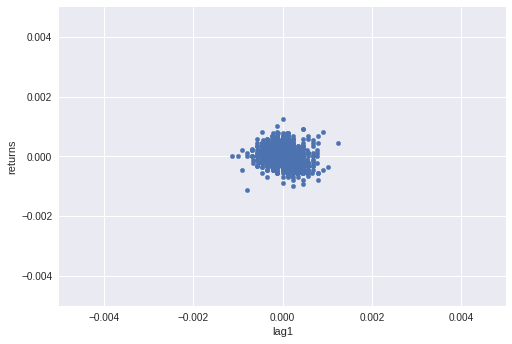

In [ ]:
data.iloc[:, -2:].plot(kind = "scatter", x = "lag1", y = "returns")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.show()

## A simple Linear Model to predict Financial Returns (Part 2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression(fit_intercept = True)

In [ ]:
lm.fit(data.lag1.to_frame(), data.returns)

LinearRegression()

In [ ]:
slope = lm.coef_
slope

array([-0.28307837])

In [ ]:
intercept = lm.intercept_
intercept

4.739834179042697e-06

In [ ]:
data["pred"] = lm.predict(data.lag1.to_frame())

In [ ]:
data

,price,returns,lag1,pred
Datetime,,,,
2022-01-27 21:15:00+00:00,1.114703,0.000000,0.000000,0.000005
2022-01-27 21:16:00+00:00,1.114703,0.000000,0.000000,0.000005
2022-01-27 21:17:00+00:00,1.114827,0.000111,0.000000,0.000005
2022-01-27 21:18:00+00:00,1.115076,0.000223,0.000111,-0.000027
2022-01-27 21:19:00+00:00,1.114827,-0.000223,0.000223,-0.000058
...,...,...,...,...
2022-02-03 21:07:00+00:00,1.143772,0.000229,-0.000114,0.000037
2022-02-03 21:08:00+00:00,1.143772,0.000000,0.000229,-0.000060
2022-02-03 21:09:00+00:00,1.143772,0.000000,0.000000,0.000005


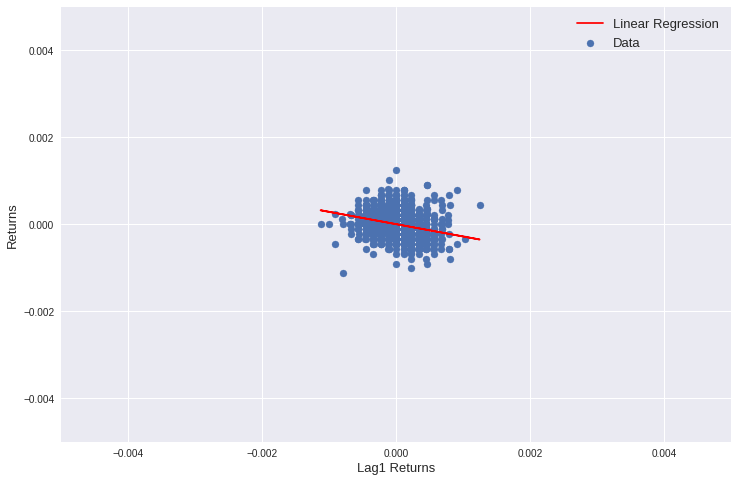

In [ ]:
plt.figure(figsize = (12, 8))
plt.scatter(x = data.lag1, y = data.returns, label = "Data")
plt.plot(data.lag1, data.pred, c = "red", label = "Linear Regression")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.legend(fontsize = 13)
plt.xlabel("Lag1 Returns", fontsize = 13)
plt.ylabel("Returns", fontsize = 13)
plt.show()

In [ ]:
data

,price,returns,lag1,pred
Datetime,,,,
2022-01-27 21:15:00+00:00,1.114703,0.000000,0.000000,0.000005
2022-01-27 21:16:00+00:00,1.114703,0.000000,0.000000,0.000005
2022-01-27 21:17:00+00:00,1.114827,0.000111,0.000000,0.000005
2022-01-27 21:18:00+00:00,1.115076,0.000223,0.000111,-0.000027
2022-01-27 21:19:00+00:00,1.114827,-0.000223,0.000223,-0.000058
...,...,...,...,...
2022-02-03 21:07:00+00:00,1.143772,0.000229,-0.000114,0.000037
2022-02-03 21:08:00+00:00,1.143772,0.000000,0.000229,-0.000060
2022-02-03 21:09:00+00:00,1.143772,0.000000,0.000000,0.000005


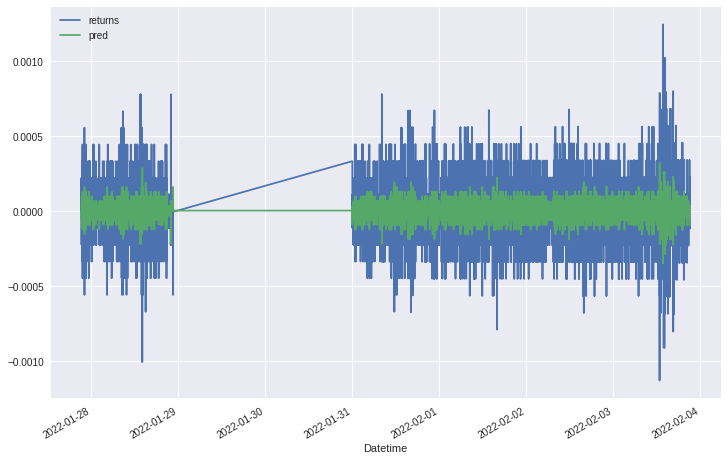

In [ ]:
data[["returns", "pred"]].plot(figsize = (12, 8))
plt.show() # model fails to predict the magnitude of returns

In [ ]:
data.pred = np.sign(data.pred) # maybe the model can predict the market direction (-1 / +1)

In [ ]:
data

,price,returns,lag1,pred
Datetime,,,,
2022-01-27 21:15:00+00:00,1.114703,0.000000,0.000000,1.0
2022-01-27 21:16:00+00:00,1.114703,0.000000,0.000000,1.0
2022-01-27 21:17:00+00:00,1.114827,0.000111,0.000000,1.0
2022-01-27 21:18:00+00:00,1.115076,0.000223,0.000111,-1.0
2022-01-27 21:19:00+00:00,1.114827,-0.000223,0.000223,-1.0
...,...,...,...,...
2022-02-03 21:07:00+00:00,1.143772,0.000229,-0.000114,1.0
2022-02-03 21:08:00+00:00,1.143772,0.000000,0.000229,-1.0
2022-02-03 21:09:00+00:00,1.143772,0.000000,0.000000,1.0


In [ ]:
np.sign(data.returns * data.pred)

Datetime
2022-01-27 21:15:00+00:00    0.0
2022-01-27 21:16:00+00:00    0.0
2022-01-27 21:17:00+00:00    1.0
2022-01-27 21:18:00+00:00   -1.0
2022-01-27 21:19:00+00:00    1.0
                            ... 
2022-02-03 21:07:00+00:00    1.0
2022-02-03 21:08:00+00:00    0.0
2022-02-03 21:09:00+00:00    0.0
2022-02-03 21:10:00+00:00    0.0
2022-02-03 21:11:37+00:00    1.0
Length: 6993, dtype: float64

In [ ]:
hits = np.sign(data.returns * data.pred).value_counts()

In [ ]:
hits

 1.0    3009
 0.0    2403
-1.0    1581
dtype: int64

In [ ]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio # percentage of correctly forecasted market directions 

0.4302874302874303

## A Multiple Regression Model to predict Financial Returns

__Adding more Features - a multiple Regression Model__

In [ ]:
start = dt.datetime.today()-dt.timedelta(7)
end = dt.datetime.today()
data = pd.DataFrame()
interval = "90m"
ticker = 'EURUSD=X'
df= yf.download(ticker,start,end,interval = '1m')
data['price']= df[['Adj Close']]
data

[*********************100%***********************]  1 of 1 completed


,price
Datetime,
2022-01-27 21:16:00+00:00,1.114703
2022-01-27 21:17:00+00:00,1.114827
2022-01-27 21:18:00+00:00,1.115076
2022-01-27 21:19:00+00:00,1.114827
2022-01-27 21:20:00+00:00,1.115076
...,...
2022-02-03 21:11:00+00:00,1.143903
2022-02-03 21:12:00+00:00,1.143903
2022-02-03 21:13:00+00:00,1.143903


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6996 entries, 2022-01-27 21:16:00+00:00 to 2022-02-03 21:15:37+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   6996 non-null   float64
dtypes: float64(1)
memory usage: 109.3 KB


In [ ]:
data.dropna(inplace = True)

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))

In [ ]:
lags = 5

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [ ]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5
Datetime,,,,,,,
2022-01-27 21:22:00+00:00,1.114703,-0.000111,-0.000223,0.000223,-0.000223,0.000223,0.000111
2022-01-27 21:23:00+00:00,1.114827,0.000111,-0.000111,-0.000223,0.000223,-0.000223,0.000223
2022-01-27 21:24:00+00:00,1.114703,-0.000111,0.000111,-0.000111,-0.000223,0.000223,-0.000223
2022-01-27 21:25:00+00:00,1.114579,-0.000111,-0.000111,0.000111,-0.000111,-0.000223,0.000223
2022-01-27 21:26:00+00:00,1.114951,0.000334,-0.000111,-0.000111,0.000111,-0.000111,-0.000223
...,...,...,...,...,...,...,...
2022-02-03 21:11:00+00:00,1.143903,0.000114,0.000000,0.000000,0.000000,0.000229,-0.000114
2022-02-03 21:12:00+00:00,1.143903,0.000000,0.000114,0.000000,0.000000,0.000000,0.000229
2022-02-03 21:13:00+00:00,1.143903,0.000000,0.000000,0.000114,0.000000,0.000000,0.000000


In [ ]:
cols

['lag1', 'lag2', 'lag3', 'lag4', 'lag5']

In [ ]:
lm = LinearRegression(fit_intercept = True)

In [ ]:
lm.fit(data[cols], data.returns)

LinearRegression()

In [ ]:
lm.coef_

array([-0.3039537 , -0.0753491 , -0.0100887 ,  0.01172115,  0.00086501])

In [ ]:
lm.intercept_

5.082584991268921e-06

In [ ]:
data["pred"] = lm.predict(data[cols].values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
data.pred = np.sign(data.pred)

In [ ]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
Datetime,,,,,,,,
2022-01-27 21:22:00+00:00,1.114703,-0.000111,-0.000223,0.000223,-0.000223,0.000223,0.000111,1.0
2022-01-27 21:23:00+00:00,1.114827,0.000111,-0.000111,-0.000223,0.000223,-0.000223,0.000223,1.0
2022-01-27 21:24:00+00:00,1.114703,-0.000111,0.000111,-0.000111,-0.000223,0.000223,-0.000223,-1.0
2022-01-27 21:25:00+00:00,1.114579,-0.000111,-0.000111,0.000111,-0.000111,-0.000223,0.000223,1.0
2022-01-27 21:26:00+00:00,1.114951,0.000334,-0.000111,-0.000111,0.000111,-0.000111,-0.000223,1.0
...,...,...,...,...,...,...,...,...
2022-02-03 21:11:00+00:00,1.143903,0.000114,0.000000,0.000000,0.000000,0.000229,-0.000114,1.0
2022-02-03 21:12:00+00:00,1.143903,0.000000,0.000114,0.000000,0.000000,0.000000,0.000229,-1.0
2022-02-03 21:13:00+00:00,1.143903,0.000000,0.000000,0.000114,0.000000,0.000000,0.000000,-1.0


In [ ]:
data.pred.value_counts()

 1.0    4152
-1.0    2838
Name: pred, dtype: int64

In [ ]:
hits = np.sign(data.returns * data.pred).value_counts()

In [ ]:
hits

 1.0    2993
 0.0    2404
-1.0    1593
dtype: int64

In [ ]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.42818311874105863

## In-Sample Backtesting and the Look-ahead-bias

In [ ]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
Datetime,,,,,,,,
2022-01-27 21:22:00+00:00,1.114703,-0.000111,-0.000223,0.000223,-0.000223,0.000223,0.000111,1.0
2022-01-27 21:23:00+00:00,1.114827,0.000111,-0.000111,-0.000223,0.000223,-0.000223,0.000223,1.0
2022-01-27 21:24:00+00:00,1.114703,-0.000111,0.000111,-0.000111,-0.000223,0.000223,-0.000223,-1.0
2022-01-27 21:25:00+00:00,1.114579,-0.000111,-0.000111,0.000111,-0.000111,-0.000223,0.000223,1.0
2022-01-27 21:26:00+00:00,1.114951,0.000334,-0.000111,-0.000111,0.000111,-0.000111,-0.000223,1.0
...,...,...,...,...,...,...,...,...
2022-02-03 21:11:00+00:00,1.143903,0.000114,0.000000,0.000000,0.000000,0.000229,-0.000114,1.0
2022-02-03 21:12:00+00:00,1.143903,0.000000,0.000114,0.000000,0.000000,0.000000,0.000229,-1.0
2022-02-03 21:13:00+00:00,1.143903,0.000000,0.000000,0.000114,0.000000,0.000000,0.000000,-1.0


In [ ]:
data["strategy"] = data.pred * data.returns

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

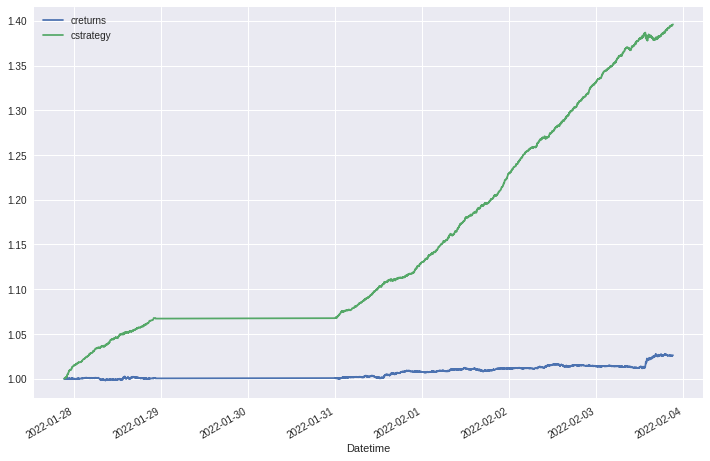

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [ ]:
data.trades.value_counts()

0.0    3775
2.0    3215
Name: trades, dtype: int64